<a href="https://colab.research.google.com/github/kaiyungtan/challenge-data-analysis/blob/master/step2_analysis_joffrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & interpretation

Watch this report with the **white theme** of Google collab.

## Installs, imports, load and definitions

In [22]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

!pip install mapclassify

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3pnkmdxw
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3pnkmdxw
  Created wheel for geopandas: filename=geopandas-0.8.0+38.gdc50b69-py2.py3-none-any.whl size=963514 sha256=003cb6d0351f7c2ea22055d6057047220a79c956a243b65cd2ed50d10e0dd8ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-gbekmcdm/wheels/91/24/71/376c9c67192694168352

In [23]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [24]:
# Load the clean CSV
url = "https://raw.githubusercontent.com/kaiyungtan/challenge-data-analysis/master/data/clean/belgium_real_estate.csv"
df = pd.read_csv(url, index_col=0)

In [25]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

## Dataframe infos

In [26]:
# Dataframe infos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40395 entries, 0 to 40394
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             40395 non-null  int64  
 1   city_name               40395 non-null  object 
 2   type_of_property        40395 non-null  int64  
 3   price                   40395 non-null  int64  
 4   number_of_rooms         40395 non-null  int64  
 5   house_area              40395 non-null  int64  
 6   fully_equipped_kitchen  40395 non-null  int64  
 7   open_fire               40395 non-null  int64  
 8   terrace                 40395 non-null  int64  
 9   garden                  40395 non-null  int64  
 10  surface_of_the_land     40395 non-null  int64  
 11  number_of_facades       40395 non-null  int64  
 12  swimming_pool           40395 non-null  int64  
 13  state_of_the_building   40395 non-null  object 
 14  lattitude               40395 non-null

In [27]:
# Dataframe nan check

df.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
garden                    0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
lattitude                 0
longitude                 0
province                  0
region                    0
dtype: int64

## Analysis

### Univariate: Price - The target

#### Number of houses to sell according to their prices

Mean: 314115 - Median: 275000 - Mode: 249000


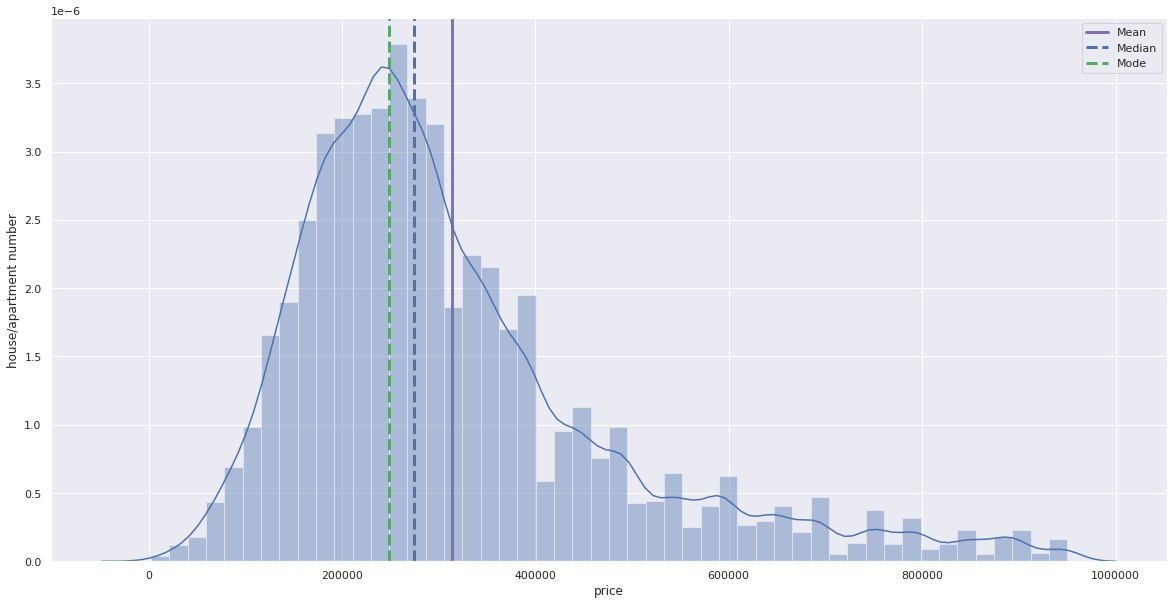

In [28]:
# Resize the graph size
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')

# Math and display the Mode, Median and Mean
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]

plt.axvline(mean, color='m', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

# Label the axis
plt.xlabel('Price')
plt.ylabel('house/apartment number')
plt.legend()

# Show the graph
ax = sns.distplot(df['price'])

mean=round(mean)
median=round(median)
mode=round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")
plt.savefig('price.svg', dpi=300)

**Observations**:

The distribution is asymetric: it's a right-skewed one.

*   The majority of the houses are sold between 200 000 and 300 000 EUR.
*   Houses sold at 250 000 EUR dominate the market.
*   A house cost around 315 000 EUR in Belgium.



#### Kurtosis & skewness

In [29]:
skew = df['price'].skew()
kurtosis = df['price'].kurt()

print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 1.370488372887947 - Kurtosis: 1.949629927156578


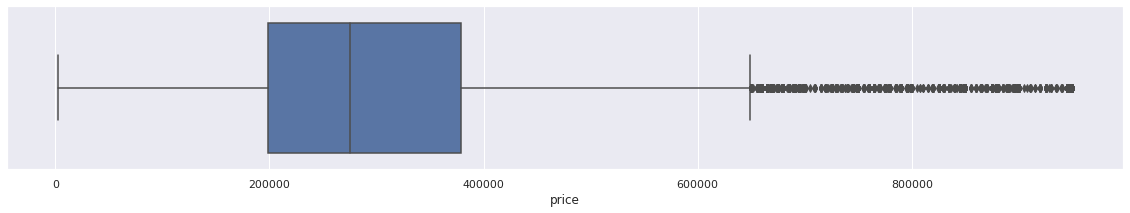

In [30]:
# Print the outliers horizontally
plt.figure(figsize=(20,3))
sns.boxplot(x=df["price"]);

**Observations**:


*   There's a huge number of houses that are sold over 600 000 EUR, a lot of outliers.

#### Price correction

In [31]:
# Remove the outliers
index = df[(df['price'] >= 720000)].index
df.drop(index, inplace=True)

# Apply Boxcox operation to reduce the skrewness
corrected_price = stats.boxcox(df['price'])[0]
df['price_corrected'] = pd.Series(corrected_price)

skew = df['price_corrected'].skew()
kurtosis = df['price_corrected'].kurt()
print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 0.017912608511114075 - Kurtosis: 0.1881562237908967


Mean: 196 - Median: 195 - Mode: 176.0


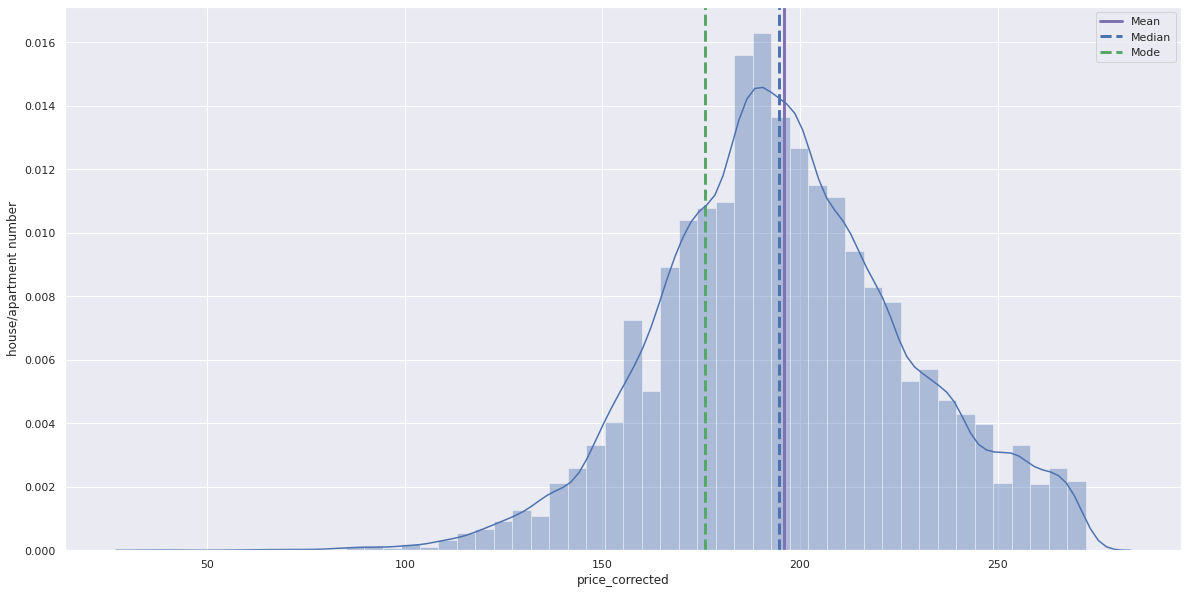

In [32]:
# Resize the graph size
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')

# Math and display the Mode, Median and Mean
mean = df['price_corrected'].mean()
median = df['price_corrected'].median()
mode = df['price_corrected'].mode()[0]


plt.axvline(mean, color='m', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

# Label the axis
plt.xlabel('Price')
plt.ylabel('house/apartment number')
plt.legend()

# Show the graph
ax = sns.distplot(df['price_corrected'])

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")
plt.savefig('price_corrected.svg', dpi=300)

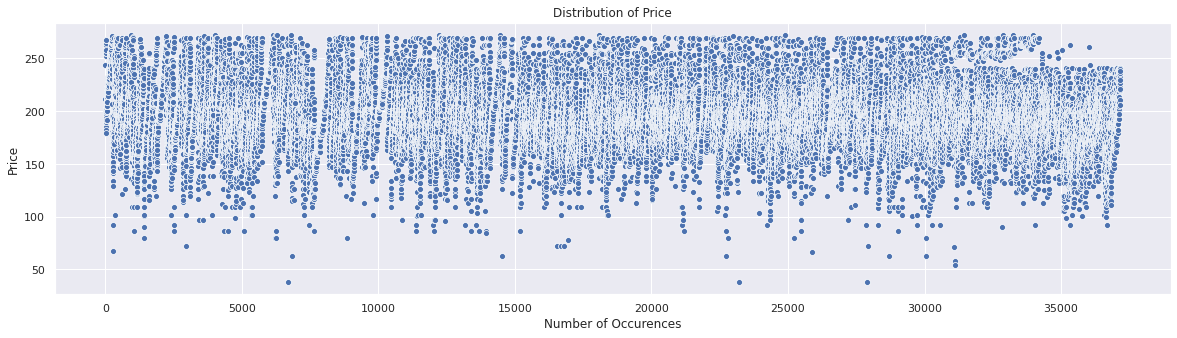

In [33]:
# Check the price distribution

plt.figure(figsize=(20,5))

plt.title("Distribution of Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Price");

ax = sns.scatterplot(range(df.shape[0]), df["price_corrected"].values)

#### Price/m2

In [34]:
df['price_m2'] = df['price'] / df['house_area']

df = movecol(df, cols_to_move=['price_m2'], ref_col='price',place='After')

### Bivariate : Heatmap

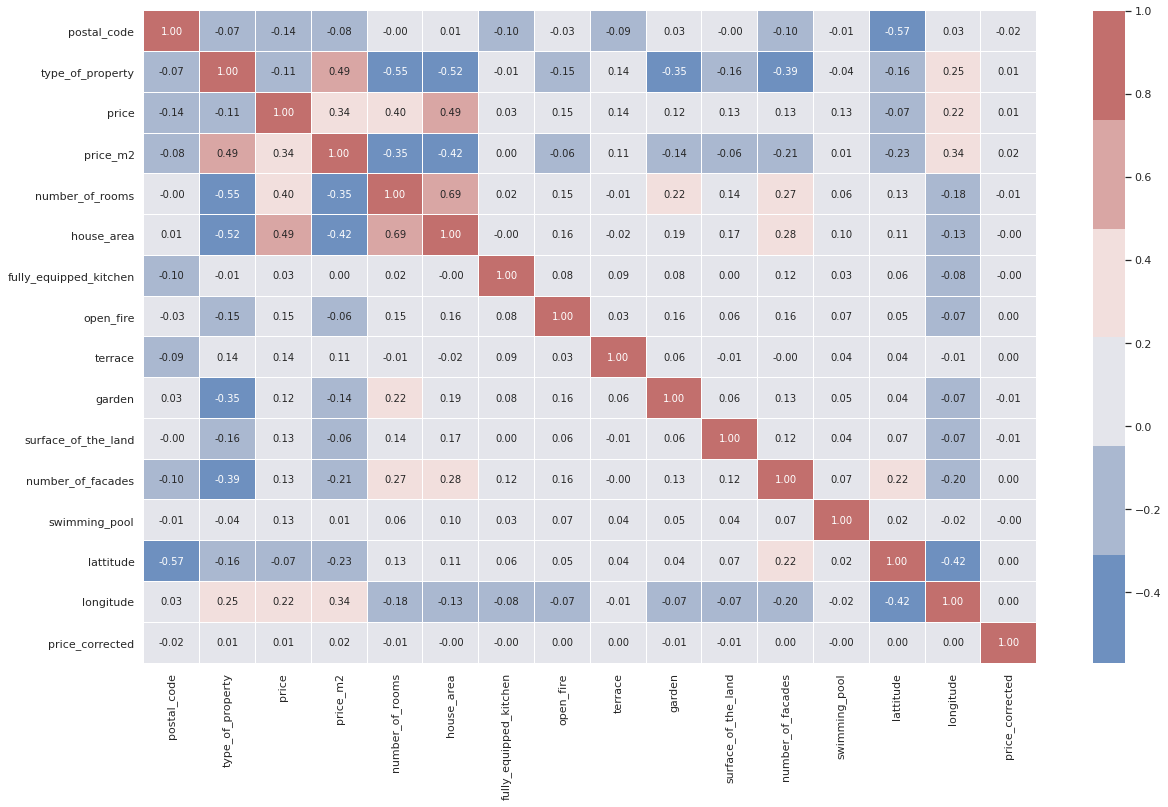

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize=(20, 12))   

# Print the heatmap
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap=sns.color_palette("vlag"))  
plt.show()

plt.savefig('heatmap.svg', dpi=300)

**Main correlations:**

The *Price* is mainly correlated with the *Number of rooms* and the *House area*.

The *Number of rooms* and *House area* seems mainly correlated with each other. They have also correlations with the *Type of property*, the *Number of facades* and the *Latitude/Longitude*.

The *Type of property* is the variables which has the most correlation with other variables.

**Other correlations:**

The *Swimming pool* seems to have a small correlation with the *Price*.

The *Open fire* seems to correlate quitely with the *Price*, the *Type of property*, the *House area*, the *Number of rooms* and the *Number of facades*.

**Details:**

*   **Strong**: *Price* and *Number of rooms*
*   **Strong**: *Price* and *House area*
*   **Strong**: *Price_m2* and *Type of property*
*   **Strong**: *Price_m2* and *Lattitute*/*Longitude*


*   **Strong**: *Number of rooms* and *Type of property*
*   **Strong**: *Number of rooms* and *House Area*
*   **Strong**: *Number of facades* and *Type of property*
*   **Strong**: *Number of facades* and *Lattitute*/*Longitude*
*   **Strong**: *Type of property* and *House Area*
*   **Strong**: *Type of property* and *Lattitute*/*Longitude*
*   Weak: *Number of rooms* and *Garden*
*   Weak: *Number of rooms* and *Number of facades*
*   Weak: *House Area* and *Number of facades*
*   Weak: *Open fire* and *price*
*   Weak: *Open fire* and *Type of property*
*   Weak: *Open fire* and *House area*
*   Weak: *Open fire* and *Number of rooms*
*   Weak: *Open fire* and *Number of facades*
*   **Strong**: *Garden* and *Type of property*
*   Weak: *Garden* and *Number of rooms*
*   Weak: *Garden* and *House area*
*   Weak: *Terrace* and *Type of property*
*   Weak: *Price* and *Swimming Pool*

### Bivariate: Price correlations

#### Price with House area

In [36]:
# Look at the correlation
df['price'].corr(df['house_area'], method='spearman')

# https://fr.wikipedia.org/wiki/Corr%C3%A9lation_de_Spearman

0.5173924625128127

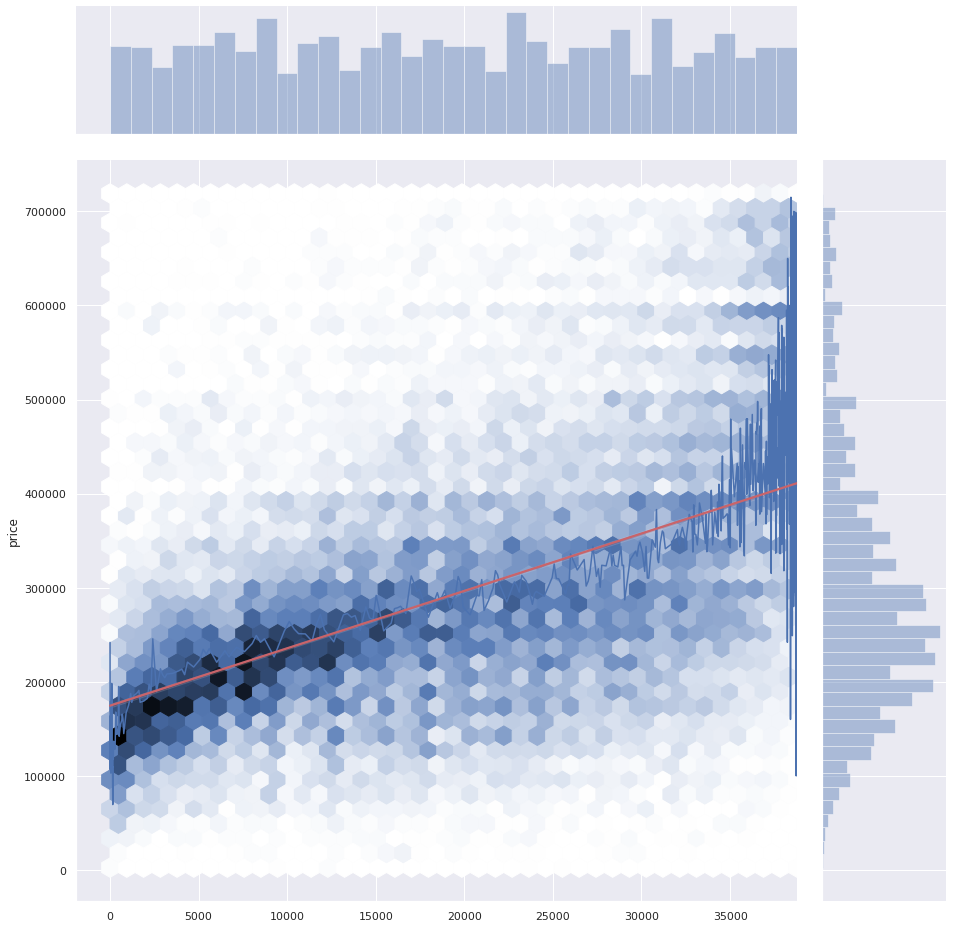

<Figure size 432x288 with 0 Axes>

In [37]:
# Displaying the relation
plot = sns.jointplot(x=stats.rankdata(df['house_area']), y=df['price'], height=13, kind="hex")
sns.lineplot(data=df, x=stats.rankdata(df['house_area']), y='price', ci=None, ax=plot.ax_joint);
sns.regplot(stats.rankdata(df['house_area']), df['price'], scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)

plt.show()
plt.savefig('price_housearea.svg', dpi=300)

**Conclusions:**

1.   The Price of a house is correlated with its area: **The higher is the area, higher is the price.**
2.   However, this correlation is not very strong, especially for big houses (houses with a area bigger than 35000 m2): The Price may vary a lot ! It may have other factor that influence the price of "big" houses.

*TODO*: Investigate the correlation Price/House area for big houses.

#### Price with Number of rooms

In [38]:
# Look at the correlation
df['price'].corr(df['number_of_rooms'])

0.39562242413770066

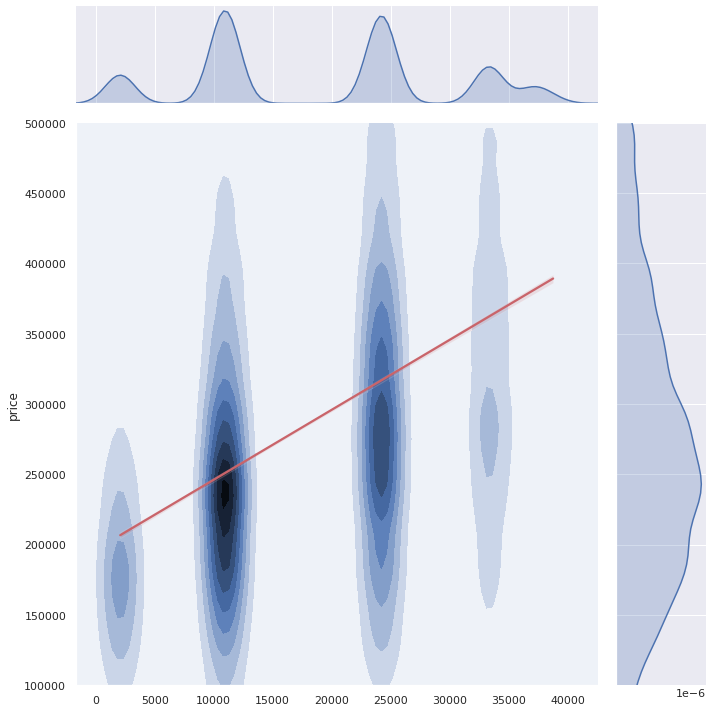

In [39]:
# Putting a regression line. 
plot = sns.jointplot(x=stats.rankdata(df['number_of_rooms']), y=df['price'], ylim=(100000, 500000), height=10, kind="kde")
sns.regplot(stats.rankdata(df['number_of_rooms']),df['price'], scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)

plt.show()

**Conclusions:**

1.   The Price of a house is correlated with the number of rooms: **More rooms tend to increase the price.**
2.   However, this correlation is weak. Maybe the number of rooms is correlated with the house area ?

### Bivariate: Price/m2 correlations

#### Price/m2 with Lattitude/Longitude

In [40]:
# Look at the correlation
df['price'].corr(df['longitude'])

0.2176693211735581

In [41]:
# Create a markers dataset
markers = df.groupby(['lattitude', 'longitude'])[['price_m2']].mean()
markers.reset_index(inplace=True)

# Append colors
# background-image: linear-gradient(to right top, #6db300, #aa9800, #d47400, #ec4731, #eb1267);
median = round(markers['price_m2'].median())
percent_25 = median // 2
percent_75 = median + percent_25
percent_95 = (median * 2) * 0.95

def add_color(x):
  if x < percent_25:
    return '#6db300'
  elif x < median:
    return '#aa9800'
  elif x < percent_75:
    return '#d47400'
  elif x < percent_95:
    return '#ec4731'
  else:
    return '#000000'

colors = markers['price_m2'].apply(lambda price: pd.Series({
    'color': add_color(price)
    }))
markers = pd.concat([markers, colors], axis=1)


**Map of the prices/m2**

In [42]:
m = folium.Map(
    location=[50.5010789, 4.4764595],
    tiles='cartodbpositron',
    zoom_start=8
    )

markers.apply(lambda loc: folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']).add_to(m), axis=1)
m

m.save("map_pricem2.html")

**Observations**:

The price/m2's distribution is quite 'grouped': They are regions where the prices are globally low, and other where the price are globally high. Like:

-  Very high in Bruxelles and around.
-  High in Flandre Orientale and Flandre Occidentale.
-  Very high in the coast.
-  Low in Wallonia.
-  Medium in Liège and around.
-  Medium near the Luxemburg.

**Conclusion**:

There's clearly a strong correlation between the location of the house and it's price/m2: Where you buy your house highly influence the price/m2

#### Belgium 5 most and less expensive municipalities

##### Average Price/m2

In [43]:
# Remove the outliers (Westouter)
df = df[df['city_name'] != "Westouter"]

# Math the top 5 max average price/m2
mean_pricem2 = df.groupby(['city_name', 'region'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name   region                
Knokke      Flandre    5435.201496
Leuven      Flandre    4706.015643
Ramskapelle Flandre    4361.488368
Heverlee    Flandre    4282.210161
Auderghem   Bruxelles  3940.477544

In [44]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

price_m2
city_name region              
Beauwelz  Wallonie  350.000000
Focant    Wallonie  390.243902
Nollevaux Wallonie  421.212121
Attre     Wallonie  560.424679
Roucourt  Wallonie  657.142857

**Observations**:

The 5 most expensive city per m2 in Belgium are:


1.   **Knokke** (Flanders), around 5500 EUR/m2
2.   **Leuven** (Flanders), around 4700 EUR/m2
3.   **Ramskapelle** (Flanders), around 4400 EUR/m2
4.   **Heverlee** (Flanders), around 4300 EUR/m2
5.   **Auderghem** (Brussels), around 4000 EUR/m2


The 5 least expensive city per m2 in Belgium are:


1.   **Beauwels** (Wallonia), around 350 EUR/m2
2.   **Focant** (Wallonia), around 390 EUR/m2
3.   **Nollevaux** (Wallonia), around 450 EUR/m2
4.   **Attre** (Wallonia), around 550 EUR/m2
5.   **Roucourt** (Wallonia), around 650 EUR/m2

Theses observations seems following the observations made on the price/m2 with lattitude/longitude map.


##### Median Price/m2

In [45]:
# Math the top 5 max median price/m2
median_pricem2 = df.groupby(['city_name', 'region'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name   region                
Knokke      Flandre    5512.092316
Ramskapelle Flandre    4241.071429
Leuven      Flandre    4090.909091
Auderghem   Bruxelles  3888.524590
Ixelles     Bruxelles  3840.000000

In [46]:
# Math the top 5 min median price/m2
median_pricem2.sort_values('price_m2', ascending=True).head()

price_m2
city_name region              
Beauwelz  Wallonie  350.000000
Focant    Wallonie  390.243902
Nollevaux Wallonie  421.212121
Attre     Wallonie  560.424679
Roucourt  Wallonie  657.142857

#### Wallonia 5 most and less expensive municipalities

##### Average Price/m2

In [47]:
# Math the top 5 max average price/m2
mean_pricem2 = df[df['region'] == 'Wallonie'].groupby(['city_name', 'province'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name        province                   
Louvain-La-Neuve Brabant wallon  3750.368855
Thines           Brabant wallon  3437.500000
Ottignies        Brabant wallon  3160.334344
Genval           Brabant wallon  3094.002085
La Hulpe         Brabant wallon  3057.616008

In [48]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

price_m2
city_name province              
Beauwelz  Hainaut     350.000000
Focant    Namur       390.243902
Nollevaux Luxembourg  421.212121
Attre     Hainaut     560.424679
Roucourt  Hainaut     657.142857

**Observations**:

The 5 most expensive city per m2 in Wallonia are:


1.   **Louvain-La-Neuve** (B. Wallon), around 3750 EUR/m2
2.   **Thines** (B. Wallon), around 3500 EUR/m2
3.   **Ottignies** (B. Wallon), around 3160 EUR/m2
4.   **Genval** (B. Wallon), around 3094 EUR/m2
5.   **La Hulpe** (B. Wallon), around 3050 EUR/m2


The 5 least expensive city per m2 in Belgium are:


1.   **Beauwels** (Hainaut), around 350 EUR/m2
2.   **Focant** (Namur), around 390 EUR/m2
3.   **Nollevaux** (Luxembourg), around 450 EUR/m2
4.   **Attre** (Hainaut), around 550 EUR/m2
5.   **Roucourt** (Hainaut), around 650 EUR/m2

Theses observations seems following the observations made on the price/m2 with lattitude/longitude map.


##### Median Price/m2

In [49]:
# Math the top 5 max median price/m2
median_pricem2 = df[df['region'] == 'Wallonie'].groupby(['city_name', 'province'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name        province                   
Louvain-La-Neuve Brabant wallon  3833.503650
Thines           Brabant wallon  3437.500000
Ottignies        Brabant wallon  3402.777778
Genval           Brabant wallon  3172.222222
La Hulpe         Brabant wallon  2976.190476

In [50]:
# Math the top 5 min average price/m2
median_pricem2.sort_values('price_m2', ascending=True).head()

price_m2
city_name province              
Beauwelz  Hainaut     350.000000
Focant    Namur       390.243902
Nollevaux Luxembourg  421.212121
Attre     Hainaut     560.424679
Roucourt  Hainaut     657.142857

#### Flanders 5 most and less expensive municipalities

##### Average Price/m2

In [51]:
# Math the top 5 max average price/m2
mean_pricem2 = df[df['region'] == 'Flandre'].groupby(['city_name', 'province'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name   province                        
Knokke      Flandre-Occidentale  5435.201496
Leuven      Brabant flamand      4706.015643
Ramskapelle Flandre-Occidentale  4361.488368
Heverlee    Brabant flamand      4282.210161
Nieuwpoort  Flandre-Occidentale  3828.161647

In [52]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

price_m2
city_name  province                       
Bossuit    Flandre-Occidentale  698.412698
Elverdinge Flandre-Occidentale  733.673469
Wijtschate Flandre-Occidentale  833.333333
Schorisse  Flandre-Orientale    836.592179
Herstappe  Limbourg             984.189723

**Observations**:

The 5 most expensive city per m2 in Flanders are:


1.   **Knokke** (F. Occidentale), around 5500 EUR/m2
2.   **Leuven** (B. Flamand), around 4700 EUR/m2
3.   **Ramskapelle** (F. Occidentale), around 4400 EUR/m2
4.   **Heverlee** (B. Flamand), around 4200 EUR/m2
5.   **Nieuwpoort** (F. Occidentale), around 3800 EUR/m2


The 5 least expensive city per m2 in Belgium are:


1.   **Bossuit** (F. Occidentale), around 700 EUR/m2
2.   **Elverdinge** (F. Occidentale), around 730 EUR/m2
3.   **wijtschate** (F. Occidentale), around 830 EUR/m2
4.   **Schorisse** (F. Orientale), around 835 EUR/m2
5.   **Herstappe** (Limbourg), around 980 EUR/m2

Theses observations seems following the observations made on the price/m2 with lattitude/longitude map.


##### Median price/m2

In [53]:
# Math the top 5 max median price/m2
median_pricem2 = df[df['region'] == 'Flandre'].groupby(['city_name', 'province'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name   province                        
Knokke      Flandre-Occidentale  5512.092316
Ramskapelle Flandre-Occidentale  4241.071429
Leuven      Brabant flamand      4090.909091
Nieuwpoort  Flandre-Occidentale  3700.961538
Gent        Flandre-Orientale    3633.669772

In [54]:
# Math the top 5 min median price/m2
median_pricem2.sort_values('price_m2', ascending=False).head()

price_m2
city_name   province                        
Knokke      Flandre-Occidentale  5512.092316
Ramskapelle Flandre-Occidentale  4241.071429
Leuven      Brabant flamand      4090.909091
Nieuwpoort  Flandre-Occidentale  3700.961538
Gent        Flandre-Orientale    3633.669772

### Bivariate: Other correlations

#### House area with Number of rooms

In [55]:
# Look at the correlation
df['house_area'].corr(df['number_of_rooms'])

0.6908853815728597

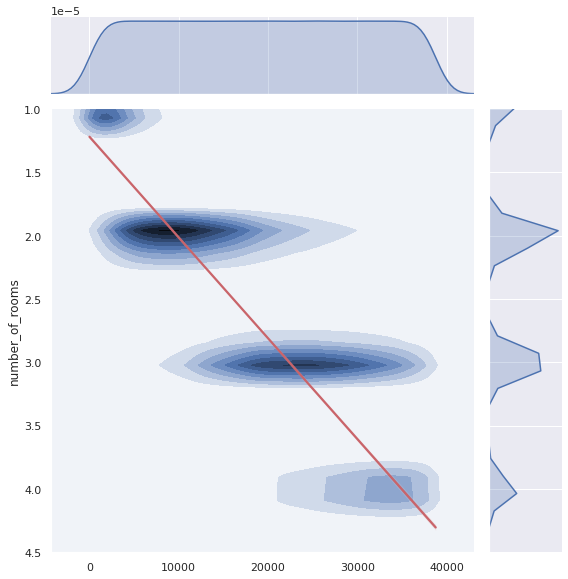

In [56]:
# Putting a regression line. 
plot = sns.jointplot(x=stats.rankdata(df['house_area']), y=df['number_of_rooms'], ylim=4.5, height=8, kind="kde")
sns.regplot(stats.rankdata(df['house_area']),df['number_of_rooms'], scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)


plt.show()

**Conclusions:**

The house area is strongly correlated with the number of rooms: **More space means more rooms**.

We know that the **Price** is influenced by the house area and the number of room:
-  The Price increase when the house have more space.
-  The Price increase when the house have more rooms.

So, **more space means more rooms, which means a higher price.**

House Area -> Number of rooms -> Price

#### Type of property with Lattitude/Longitude

**Type of peroperty** is the variable that has the most correlations with other variables. Let's see on a map how is distributed the type of property:

In [57]:
# Look at the correlation
df['type_of_property'].corr(df['longitude'])

0.25265683748411666

In [58]:
# Create a markers dataset
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
markers = df.groupby(['lattitude', 'longitude'])['type_of_property'].apply(pd.Series.mode).to_frame()
markers.reset_index(inplace=True)

# Append colors
# background-image: linear-gradient(to right top, #6db300, #aa9800, #d47400, #ec4731, #eb1267);

def add_color(x):
  if x == 0:
    return '#051937'
  else:
    return '#845EC2'

colors = markers['type_of_property'].apply(lambda facades: pd.Series({
    'color': add_color(facades)
    }))
markers = pd.concat([markers, colors], axis=1)

# Drop 0 and 'level_2'
markers.drop(columns='level_2', inplace=True)

In [59]:
# Create the map
m = folium.Map(
    location=[50.5010789, 4.4764595],
    tiles='cartodbpositron',
    zoom_start=8
    )

markers.apply(lambda loc: folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']).add_to(m), axis=1)
m

m.save("map_propertytype.html")

**Legend:**
-   Black: house
-   Purple: apartment

**Observations**:

The correlation between the type of property is weak. However, some trends can be seen on this map:

1.   In wallonia, the apartments are mainly sold in the main cities and around (Liège, Namur, Charleroi, Mons). The rest of Wallonia's real estate offers are houses.
2.   In Flanders, there's no real trend. We can notice a huge concentration of apartment in Anvers, and at the sea.
3.   In Brussels, the maojority of the offers are apartments.


**Conclusion**:

In wallonia, house are sold in the countryside and around the big cities, while apartement are sold in the big cities. In Brussels, there's almost only apartment. Same for Anvers. The rest of Flanders is mixed.

#### Type of property with Number of rooms

In [60]:
# Correlation's lookup
df['type_of_property'].corr(df['number_of_rooms'])

-0.549625862363519

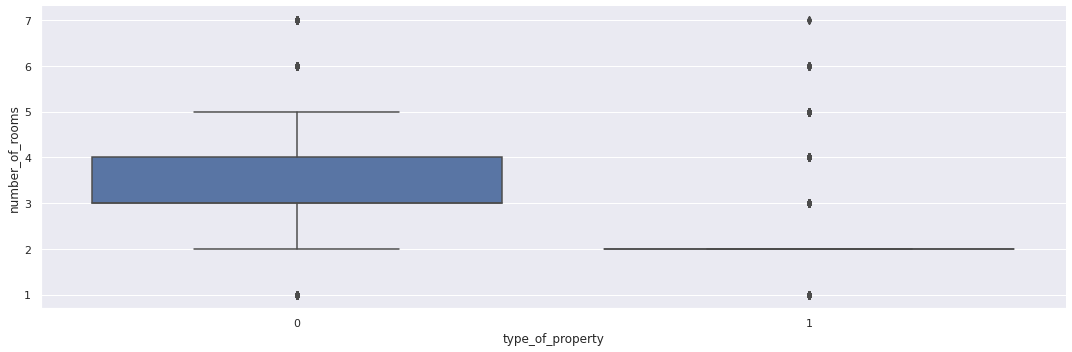

<Figure size 432x288 with 0 Axes>

In [61]:
# Remove outliers
rooms_type = df[(df['number_of_rooms'] <= 7)]

# Display the correlation
plot = sns.catplot(x="type_of_property", y="number_of_rooms", kind="box", height=5, aspect=3, data=rooms_type)
plt.show()

plt.savefig('propertytype_roomsnumber.svg', dpi=300)

**Conclusions:**

Houses have much more rooms than apartments. They are bigger:
-   An apartment has around 2 rooms.
-   A house has generally between 2 and 5 rooms.

So, **the number of rooms is highly dependent of the type of property**.
Buying a house means buying a lot of rooms.

#### Type of property with house area

In [62]:
# Look at the correlation
df['type_of_property'].corr(df['house_area'])

-0.5228113688571678

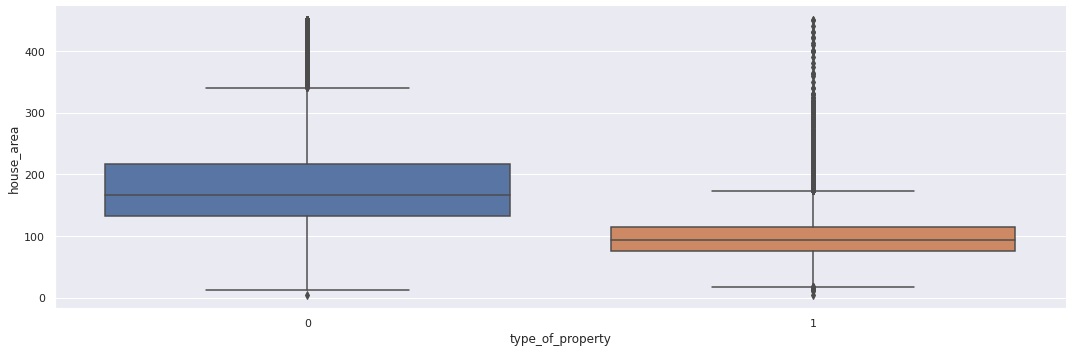

<Figure size 432x288 with 0 Axes>

In [63]:
# Remove outliers
area_type = df[(df['house_area'] <= 450)]

# Display the correlation
plot = sns.catplot(x="type_of_property", y="house_area", kind="box", height=5, aspect=3, data=area_type)
plt.show()

area_type.groupby('type_of_property')['house_area'].median()

plt.savefig('housearea_typeproperty.svg', dpi=300)

**Conclusions:**

A house has more space than an apartment. They are wider:
-   An apartment is around 90 m2
-   A house ius is around 167 m2

This correlation is confirmed by the previous correlation:

Houses has much more space, and more rooms than an apartment. **Buying a house means buying more space (more m2), and having more rooms inside.**

#### Type of property with garden

In [64]:
# Correlation's lookup
df['type_of_property'].corr(df['garden'])

-0.35033492192460564

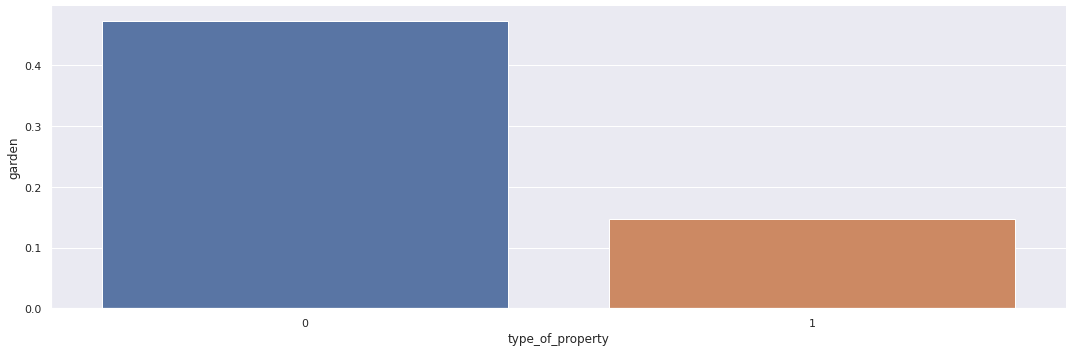

In [65]:
plot = sns.catplot(x="type_of_property", y="garden", data=df, kind="bar", ci=None, height=5, aspect=3)

plt.savefig('garden_typeproperty.svg', dpi=300)

**Observations:**

Having a garden means having more space (m2).

Due to the weak correlation, the following is a trend:
-   The houses are more likeky to have a garden (50%).
-   A  small portion of the appartment (15%) has also a garden.

Houses are more likely to have a garden than appartment.

**Conclusions:**

We know, from the previous obsevation, that:

Houses has much more space, and more rooms than an apartment. Buying a house means buying more space (more m2), and having more rooms inside.

But **buying a house means also buying a garden, and so inscreasing the total of m2 bought**.

#### Type of property with Price/m2

In [66]:
# Look at the correlation
df['price_m2'].corr(df['type_of_property'], method='spearman')

0.6032725168504877

In [67]:
# Remove the outliers
df = df[(df['price_m2'] <= 14000)]

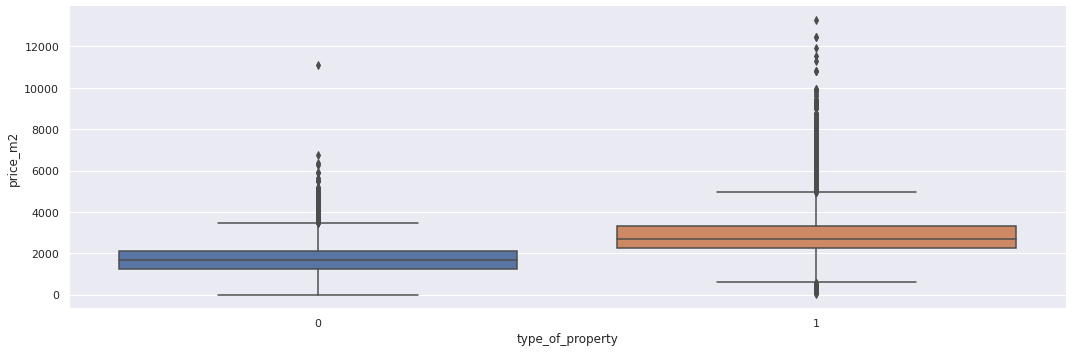

<Figure size 432x288 with 0 Axes>

In [68]:
# Displaying the correlation
# 0 = House
# 1 = Appartement

plot = sns.catplot(x="type_of_property", y="price_m2", kind="box", height=5, aspect=3, data=df)
plt.show()

df.groupby('type_of_property')['price_m2'].median()

plt.savefig('pricem2_propertytype.svg', dpi=300)

**Conclusions:**

The Price/m2 is cheaper for a house, than for an apartment:
-   Around 1700 EUR/m3 for a House.
-   Around 3000 EUR/m3 for an apartment.


#### Number of facades with Lattitude/Longitude

In [69]:
# Look at the correlation
df['number_of_facades'].corr(df['longitude'])

-0.20391562034041047

In [70]:
# Create a markers dataset
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
markers = df.groupby(['lattitude', 'longitude'])['number_of_facades'].apply(pd.Series.mode).to_frame()
markers.reset_index(inplace=True)

# Append colors
# background-image: linear-gradient(to right top, #6db300, #aa9800, #d47400, #ec4731, #eb1267);

def add_color(x):
  if x == 4:
    return '#6db300'
  elif x == 3:
    return '#d47400'
  elif x == 2:
    return '#eb1267'

colors = markers['number_of_facades'].apply(lambda facades: pd.Series({
    'color': add_color(facades)
    }))
markers = pd.concat([markers, colors], axis=1)

# Drop 0 and 'level_2'
markers.drop(columns='level_2', inplace=True)
markers = markers[markers['number_of_facades'] != 0]

In [71]:
m = folium.Map(
    location=[50.5010789, 4.4764595],
    tiles='cartodbpositron',
    zoom_start=8
    )

# folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']
markers.apply(lambda loc: folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']).add_to(m), axis=1)
m

m.save("map_facades.html")

**Legend:**
-   Green: 4 facades
-   Orange: 3 facades
-   Red: 2 facades

**Observations**:

The correlation between the number of facades and the location is weak. However, some trends can be seen on this map:

1.   In wallonia, the majority of the houses are 4 facades. They are 3 and 2 facades' houses in the main cities and around (Liège, Namur, Charleroi, Mons).
2.   Same in Flanders, where the main cities are Ghent and Kortrijk.
2.   Anvers and Brussels, the two biggest cities of Belgium, have a majority of 2 facades' houses.
3.   The coast has mainly 2 facades houses.


**Conclusion**:

Houses/appartments whit smaller number of facades tend to be around big cities and at the sea.

Comparing this map and the price/m2 map, we can say that there's no correlation between the number of facades and the price/m3.

# Conclusions

In [72]:



m = folium.Map(location=[50.5010789, 4.4764595], zoom_start=8, tiles='cartodbpositron')

folium.Choropleth(
    geo_data="/content/drive/My Drive/datas/belgium/cities/belgian_cities.json",
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

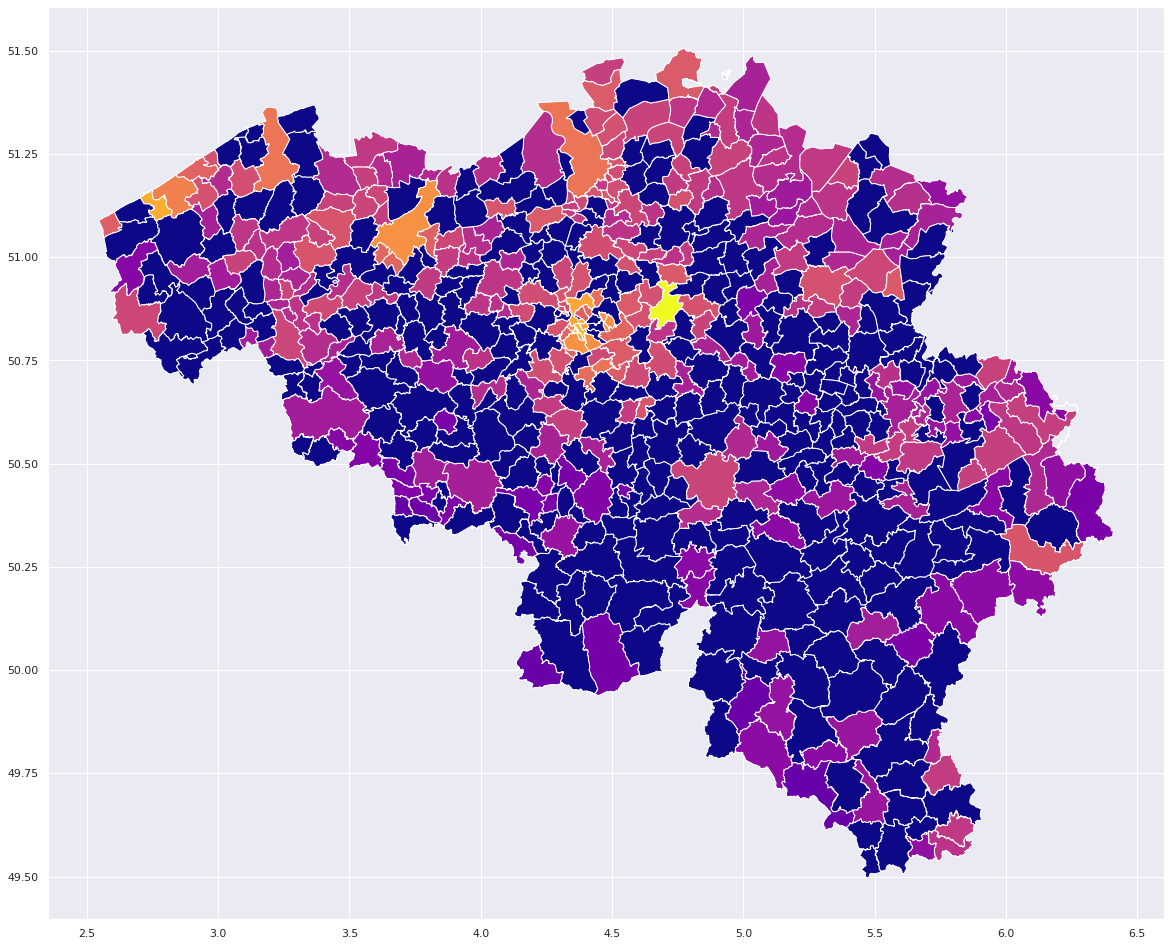

In [73]:
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(30, 10))

median_price = df.groupby(['city_name'])[['price_m2']].mean()
median_price.reset_index(inplace=True)

# Load the shapefile and merge it with the dataframe
map_df = gpd.read_file('/content/drive/My Drive/datas/belgium/municipalities/BELGIUM_-_Municipalities.geojson')
merged = map_df.merge(median_price, how='left', left_on="Communes", right_on="city_name")

#merged = merged.groupby(['NAME_4', 'geometry'])[['price_m2']].median()
merged.fillna(0, inplace=True)
#merged.reset_index(inplace=True)

merged.head()

# set the range for the choropleth values
vmin, vmax = 0, 7000

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
fig.colorbar(sm)

merged.plot(column='price_m2', cmap='plasma', figsize=(20, 20))
#cities.plot(cmap='jet', figsize=(20, 20))
#merged.head()

In [74]:
df['city_name'].value_counts()

Antwerpen     828
Oostende      678
Gent          594
Knokke        542
Uitkerke      446
             ... 
Haut-Ittre      1
Herstappe       1
Duras           1
Gibecq          1
Florée          1
Name: city_name, Length: 1041, dtype: int64